# ML project to predict the Placement


1.Input cols: cgpa, resume_score  
2.Outpur cols: placed



---



---




In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/placement.csv')

In [ ]:
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


In [ ]:
# steps
#0.preprocess + EDA + Feature selection
#1.Extract input and output cols
#2.scale the values
#3.train test split
#4.train the model
#5.evaluate the model/model selection
#6.deploy the model

In [ ]:
df.info() #preprocess

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cgpa          100 non-null    float64
 1   resume_score  100 non-null    float64
 2   placed        100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [ ]:
df.shape

(100, 3)

In [ ]:
import matplotlib.pyplot as plt

Scatter plot yello->placed,,,,,,blue->not placed

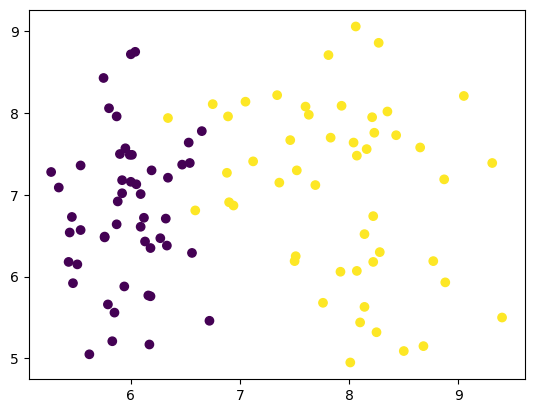

In [ ]:
plt.scatter(df['cgpa'],df['resume_score'],c=df['placed']) #EDA

In [ ]:
x = df.iloc[:,0:2] #need cgpa and resume_score.......extract input cols
y = df.iloc[:,-1]  #need placed cols.....extract output cols

In [ ]:
x

,cgpa,resume_score
0,8.14,6.52
1,6.17,5.17
2,8.27,8.86
3,6.88,7.27
4,7.52,7.30
...,...,...
95,6.33,6.38
96,8.23,7.76
97,6.65,7.78
98,8.14,5.63


In [ ]:
y

,placed
0,1
1,0
2,1
3,1
4,1
...,...
95,0
96,1
97,0
98,1


In [ ]:
from sklearn.model_selection import train_test_split  #train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1) #10 raws test 90 for train

In [ ]:
x_train

,cgpa,resume_score
79,5.27,7.28
23,6.05,7.13
83,7.60,8.08
22,6.16,5.77
19,6.75,8.11
...,...,...
18,5.94,5.88
34,8.87,7.19
40,8.25,5.32
31,5.92,7.02


In [ ]:
y_train

,placed
79,0
23,0
83,1
22,0
19,1
...,...
18,0
34,1
40,1
31,0


In [ ]:
x_test

,cgpa,resume_score
59,5.95,7.57
50,8.22,6.74
54,5.92,7.18
48,5.54,6.57
9,7.69,7.12
82,7.92,6.06
64,7.93,8.09
12,6.09,7.01
11,5.44,6.54
84,5.76,6.49


In [ ]:
y_test

,placed
59,0
50,1
54,0
48,0
9,1
82,1
64,1
12,0
11,0
84,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train) #scale the values bet -1 t0 1

In [ ]:
x_train

array([[-1.5325329 ,  0.34663011],
       [-0.83147849,  0.19816861],
       [ 0.56164245,  1.13842479],
       [-0.73261185, -1.14788233],
       [-0.2023271 ,  1.16811709],
       [ 0.43581217,  0.73263002],
       [ 1.04698781, -0.40557483],
       [-1.35277536, -0.99942083],
       [-0.88540576,  0.55447621],
       [ 0.48973943,  0.36642498],
       [-0.99326028, -0.28680563],
       [ 1.0110363 , -1.47449764],
       [-0.57083006,  0.27734808],
       [ 1.23573323,  1.07904019],
       [ 0.98407267,  0.54457878],
       [-0.45398766,  0.43570701],
       [-0.6337452 , -0.45506199],
       [ 1.50536954,  0.64355312],
       [-0.99326028,  1.01965559],
       [-1.0651633 , -1.2567541 ],
       [ 0.48075156, -0.67280553],
       [-1.21795721, -1.86049754],
       [ 1.11889083, -0.74208756],
       [-1.1011148 ,  1.48483496],
       [ 0.13022435,  0.47529675],
       [ 0.76836362,  0.76232232],
       [ 1.61322407, -0.73219013],
       [ 1.17281809, -0.62331836],
       [ 1.37055139,

In [ ]:
x_test = scaler.transform(x_test)

In [ ]:
x_test

array([[-0.92135726,  0.63365568],
       [ 1.11889083, -0.18783129],
       [-0.94832089,  0.24765578],
       [-1.28986022, -0.35608766],
       [ 0.64253334,  0.18827118],
       [ 0.84925452, -0.86085677],
       [ 0.85824239,  1.14832222],
       [-0.79552698,  0.07939941],
       [-1.37973899, -0.38577996],
       [-1.09212693, -0.43526713]])

In [ ]:
from sklearn.linear_model import LogisticRegression #use logistic Regression classifier

In [ ]:
clf = LogisticRegression() #clf logistic Regression object

In [ ]:
# model training
clf.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = clf.predict(x_test) #evaluate the model/model selection

In [ ]:
y_test #compare model prediction and y_test data

,placed
59,0
50,1
54,0
48,0
9,1
82,1
64,1
12,0
11,0
84,0


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred) #accuracy bet model prediction

1.0

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

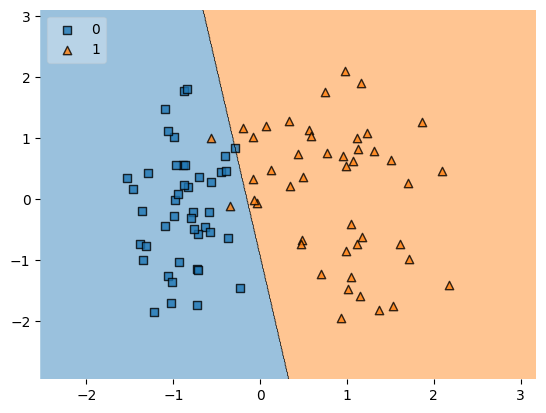

In [ ]:
##decision boundry,what pattern notice our model if u want visualize
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)